In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import io
from google.colab import files

# Загрузка файла
uploaded = files.upload()

# Получение имени файла
uploaded_file_name = next(iter(uploaded))

# Создание DataFrame из загруженных данных
df = pd.read_csv(io.StringIO(uploaded[uploaded_file_name].decode('utf-8')))

# Вывод первых нескольких строк датасета для проверки
df.head()

Saving dataset_0.csv to dataset_0 (3).csv


feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -2.899907   0.416956  -2.537387          1   0.525815  -2.830056   
1  -0.503141   0.283345   0.325574          1   0.317668   0.599717   
2  -6.560124  -1.334441   0.562320          0   0.087322  -4.781831   
3 -10.912819   0.308334  -3.496197          0   0.082024 -12.598419   
4  -4.609628  -2.721853   1.713445          0   0.370517   6.739384   

   feature_6  feature_7  feature_8  feature_9  ...  feature_12  feature_13  \
0  -2.770089  -0.522188  -0.016822   3.997906  ...   -2.772272    0.335127   
1  -0.270953   1.359805   1.725321   2.288644  ...   -0.838587    0.888538   
2  -0.238253  -0.821628  -2.615665   2.330243  ...   -1.525412   -0.696060   
3  -0.247768  -1.128131  -5.131549   2.679787  ...   -4.801637    1.103051   
4  -1.282858   3.624201   3.042493   4.732795  ...   -2.447469    1.322181   

   feature_14  feature_15  feature_16  feature_17  feature_18  feature_19  \
0   -4.289254   -2.312227   -1.140747   -0.364969    1.951992    3.202033   
1   -1.692029   -3.043541    0.666780   -0.740434   -3.157307   -0.414575   
2   -1.470102   -2.303350   -2.282194   -0.856081    1.759247    2.032912   
3   -6.771097   -4.397974   -7.358083    1.276255    1.358367    4.895844   
4   -6.079337    1.234235    2.581851   -0.079946    3.019740    2.101344   

   feature_20  class  
0           0      1  
1           0      1  
2           1      1  
3           0      1  
4           0      1  

[5 rows x 22 columns]

In [9]:
print(df.columns, '\n', f' Размерность данных: {df.shape[0]} строк и {df.shape[1]} столбцов')

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'class'],
      dtype='object') 
  Размерность данных: 1014 строк и 22 столбцов


In [11]:
def low_correlation_features(data, threshold):
    corr_matrix = data.corr()
    target_corr = abs(corr_matrix['class'])
    low_corr_columns = [column for column in target_corr.index if target_corr[column] < threshold]
    return low_corr_columns

threshold = 0.3

print("Колонки с низкой корреляцией:", low_correlation_features(df, threshold))

Колонки с низкой корреляцией: ['feature_1', 'feature_3', 'feature_4', 'feature_13', 'feature_17', 'feature_20']


In [13]:
# Вычисление дисперсии для каждого признака, кроме 'class'
feature_columns = [col for col in df.columns if col != 'class']
variances = df[feature_columns].var()

# Определение признаков с дисперсией меньше 2
low_variance_features = variances[variances < 2].index

# Вывод отфильтрованных признаков с дисперсией меньше 2
print("Признаки с низкой дисперсией меньше 2:\n", low_variance_features)

Признаки с низкой дисперсией меньше 2:
 Index(['feature_1', 'feature_3', 'feature_4', 'feature_13', 'feature_17',
       'feature_20'],
      dtype='object')


In [14]:
df_clear = df.drop(columns=['feature_1', 'feature_3', 'feature_4', 'feature_13', 'feature_17',
       'feature_20'])
df_clear.columns

Index(['feature_0', 'feature_2', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_14', 'feature_15', 'feature_16', 'feature_18', 'feature_19',
       'class'],
      dtype='object')

In [15]:
corr = df_clear.corr()

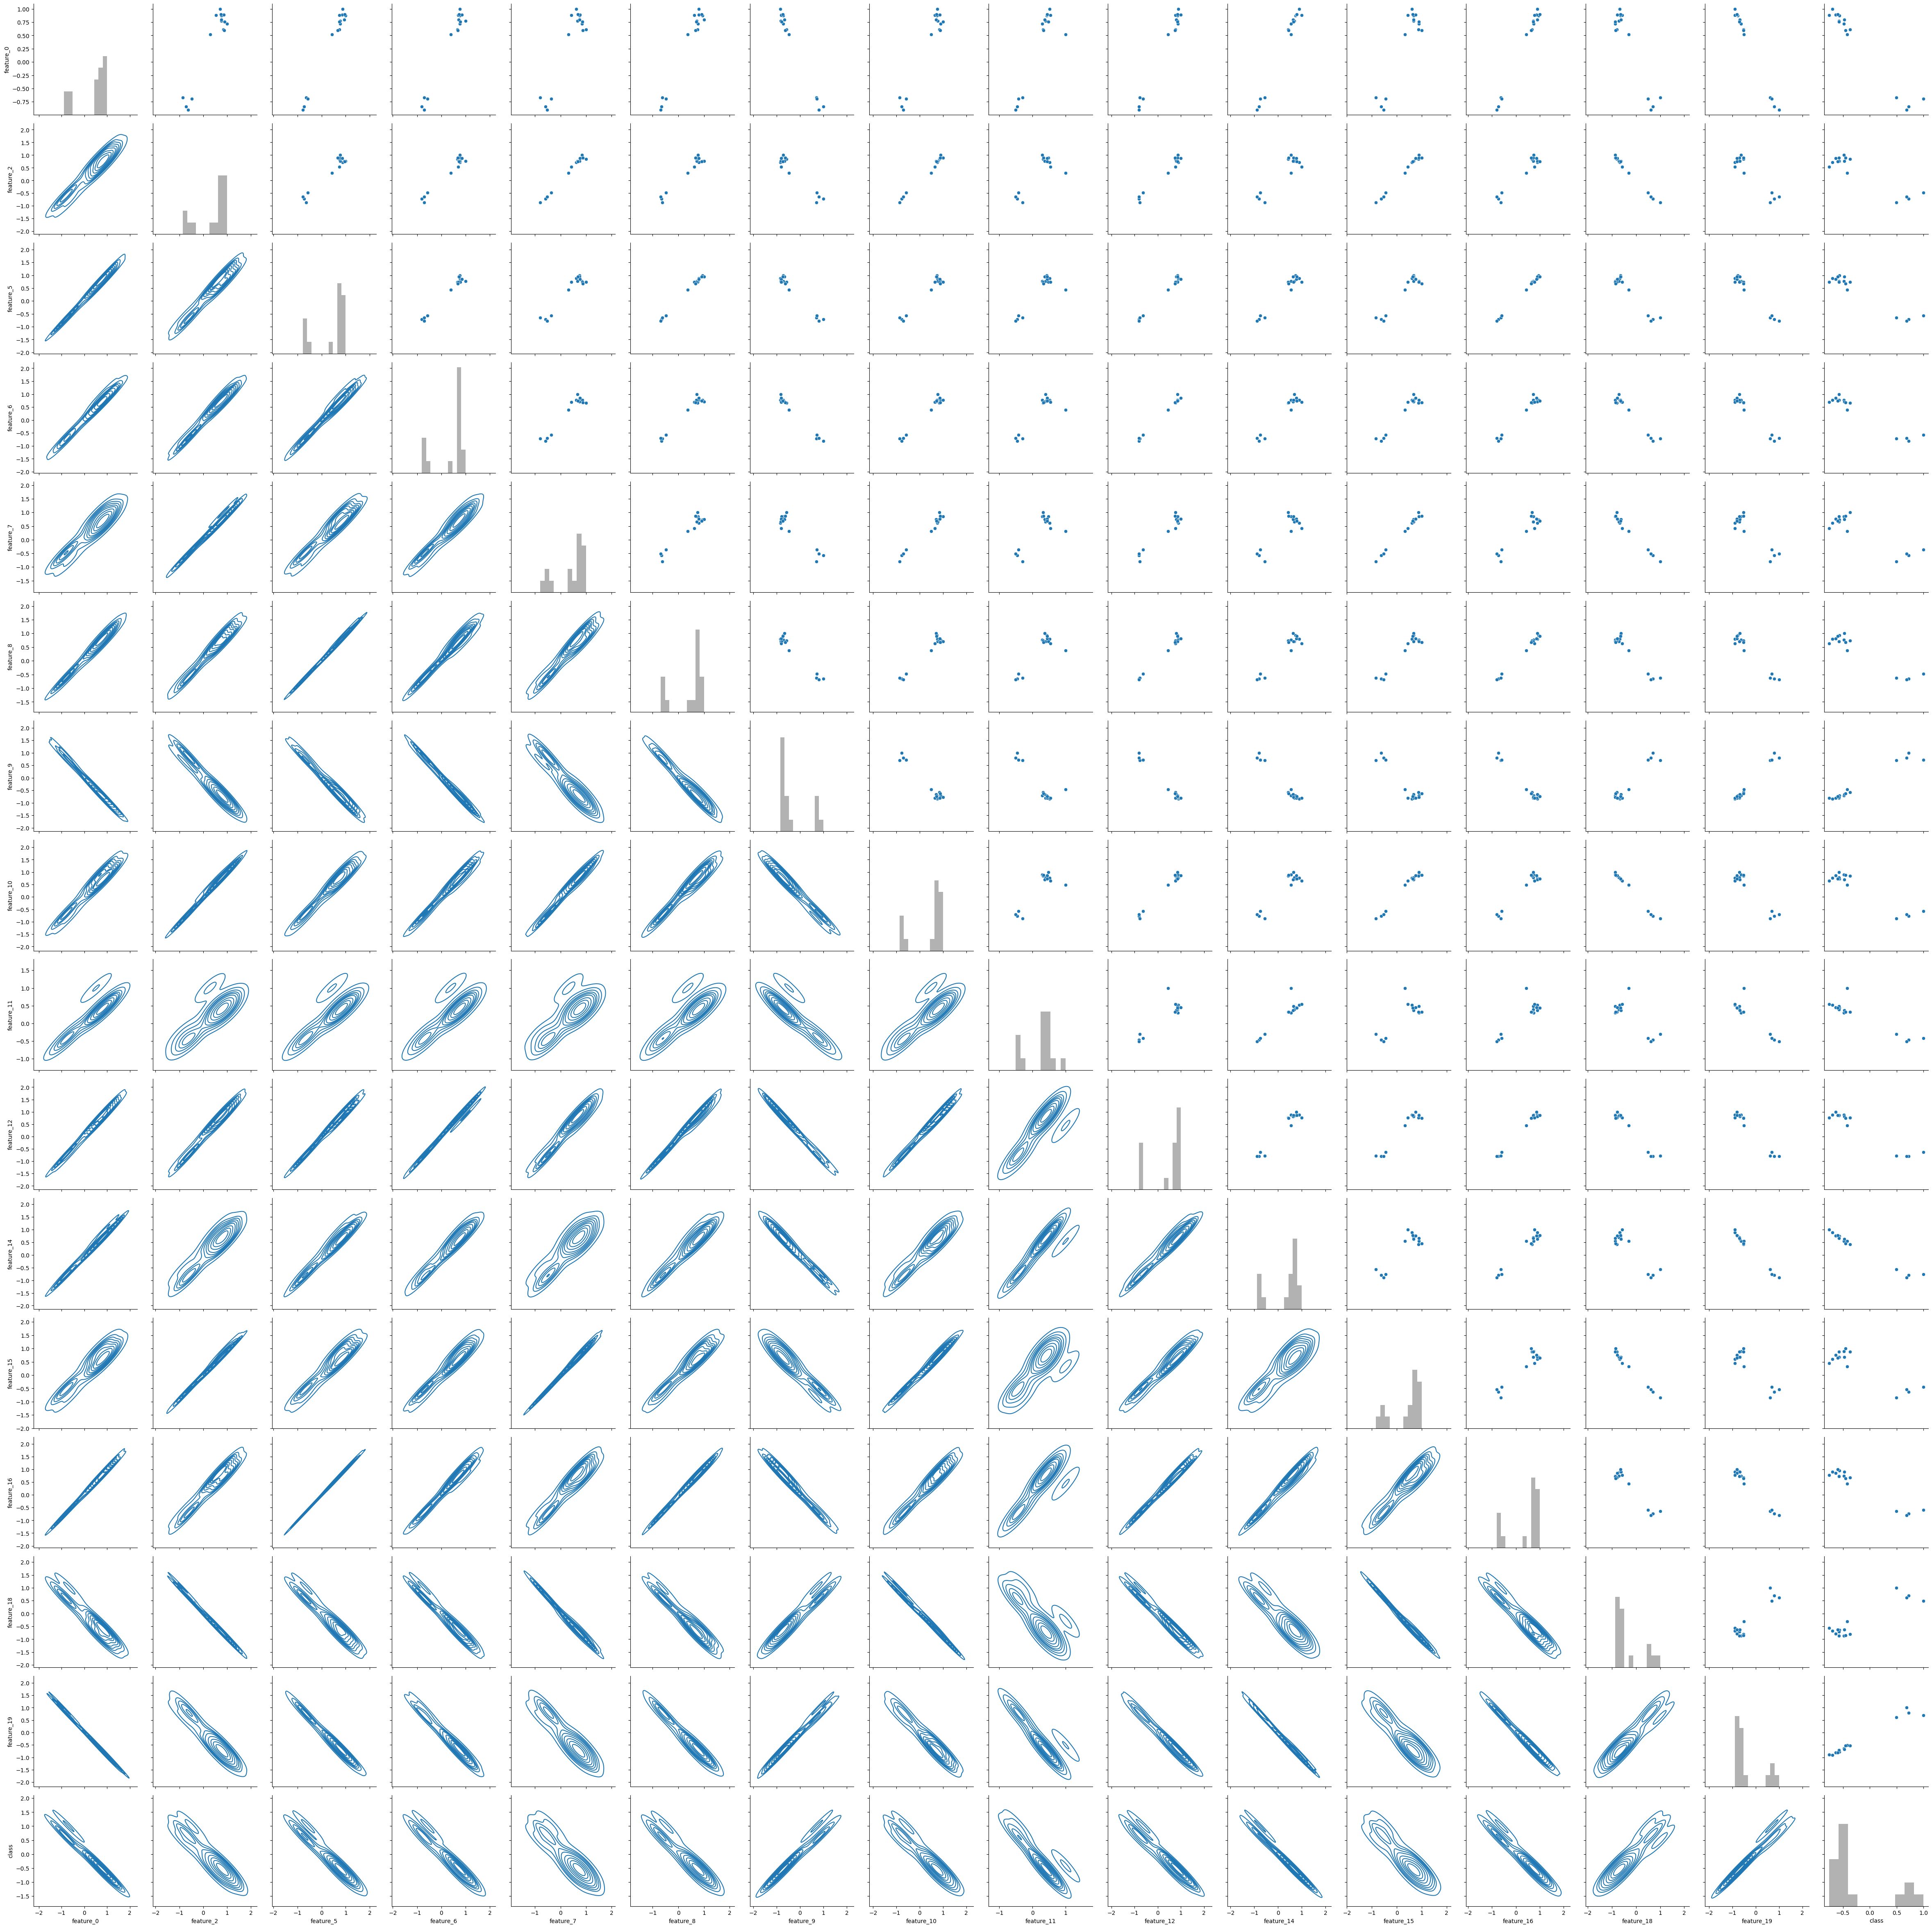

In [17]:
pairplt = sns.PairGrid(corr, height=3)
pairplt.map_upper(sns.scatterplot)
pairplt.map_diag(plt.hist, alpha=0.3, color='black')
pairplt.map_lower(sns.kdeplot);

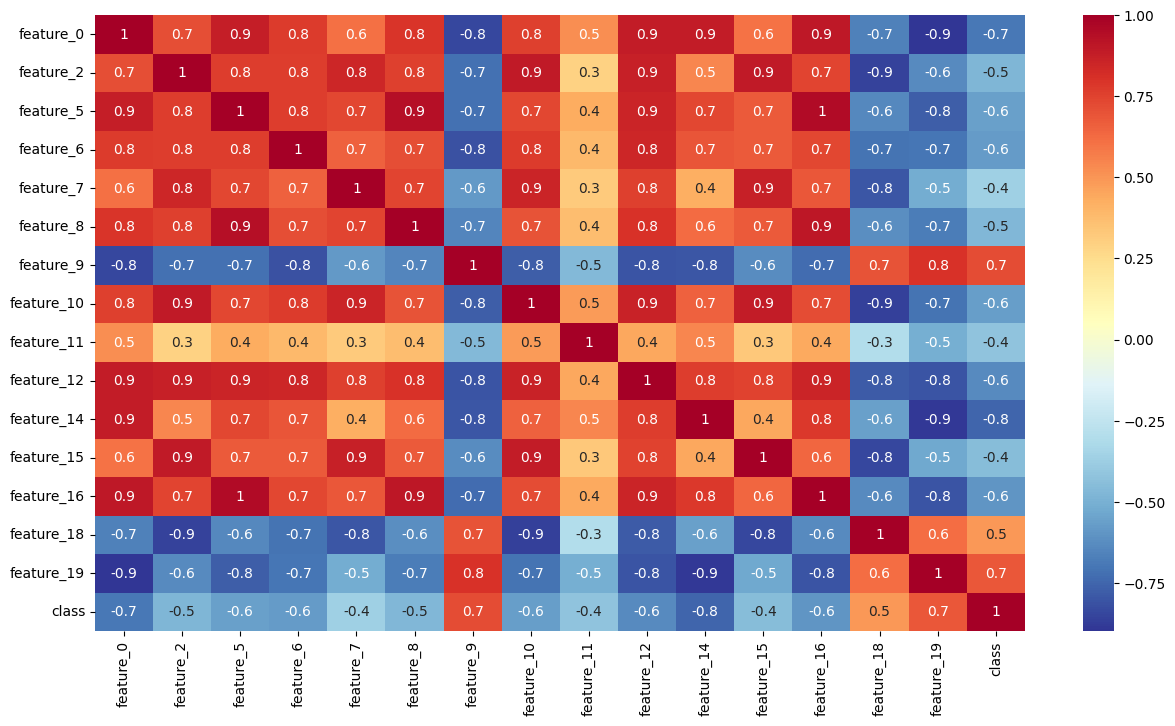

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='RdYlBu_r');
plt.show()

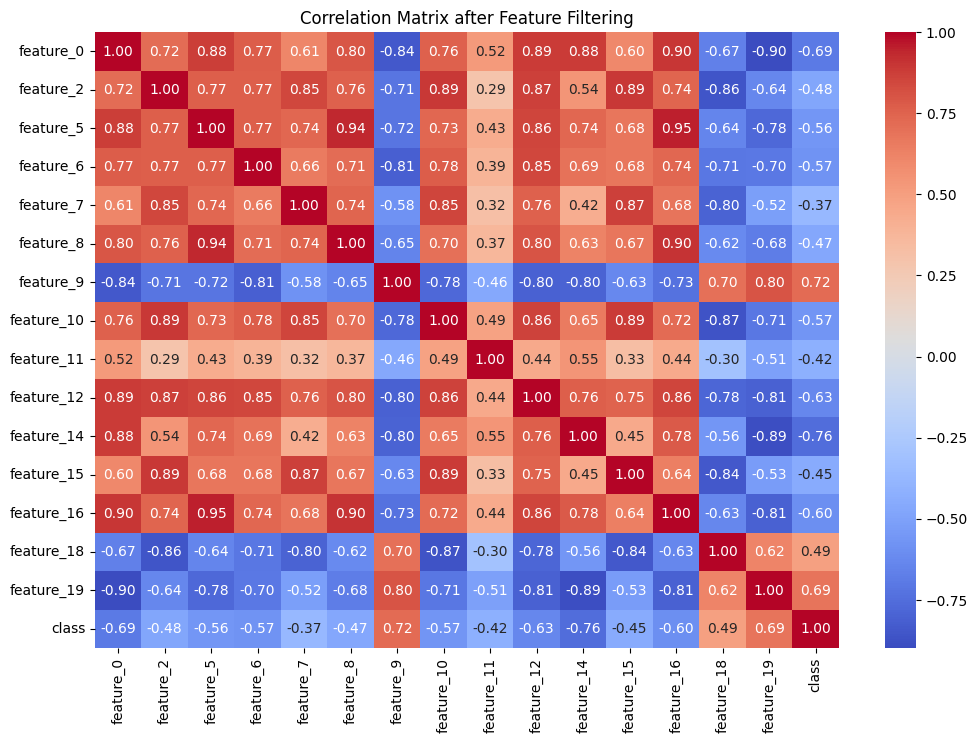

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Исключение признаков с низкой корреляцией и низкой дисперсией
low_corr_low_variance_columns = ['feature_1', 'feature_3', 'feature_4', 'feature_13', 'feature_17', 'feature_20']
df_filtered = df.drop(low_corr_low_variance_columns, axis=1)

# Построение новой корреляционной матрицы
corr_filtered = df_filtered.corr()

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(corr_filtered, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix after Feature Filtering')
plt.show()

In [25]:
print("Columns before filtering:", df.columns)
print("Columns after filtering:", df_filtered.columns)

Columns before filtering: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'class'],
      dtype='object')
Columns after filtering: Index(['feature_0', 'feature_2', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_14', 'feature_15', 'feature_16', 'feature_18', 'feature_19',
       'class'],
      dtype='object')


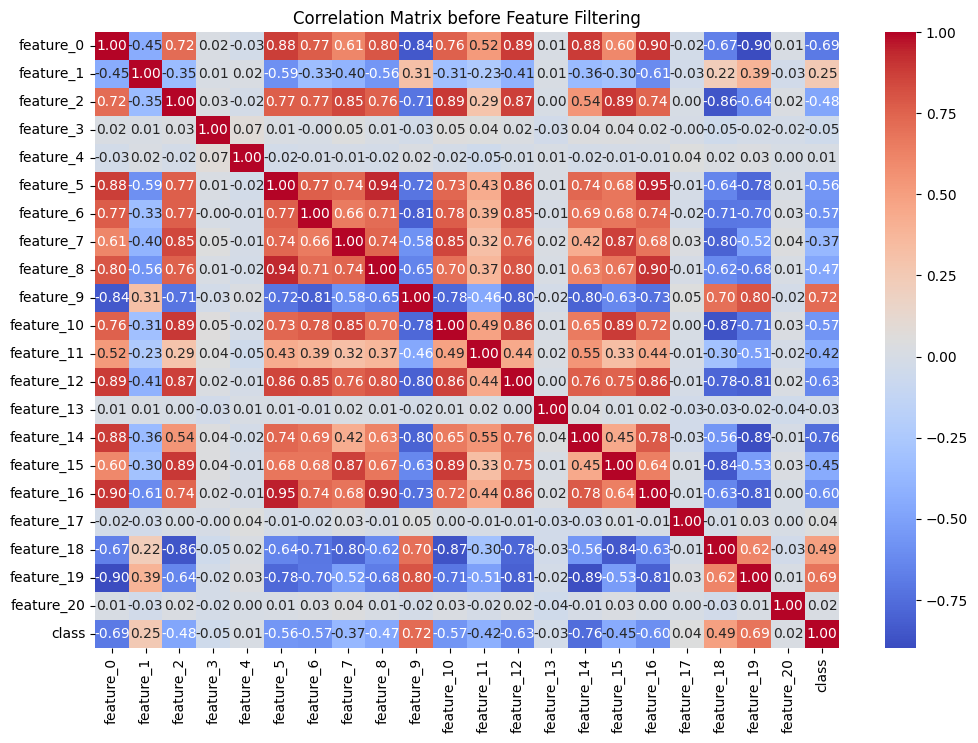

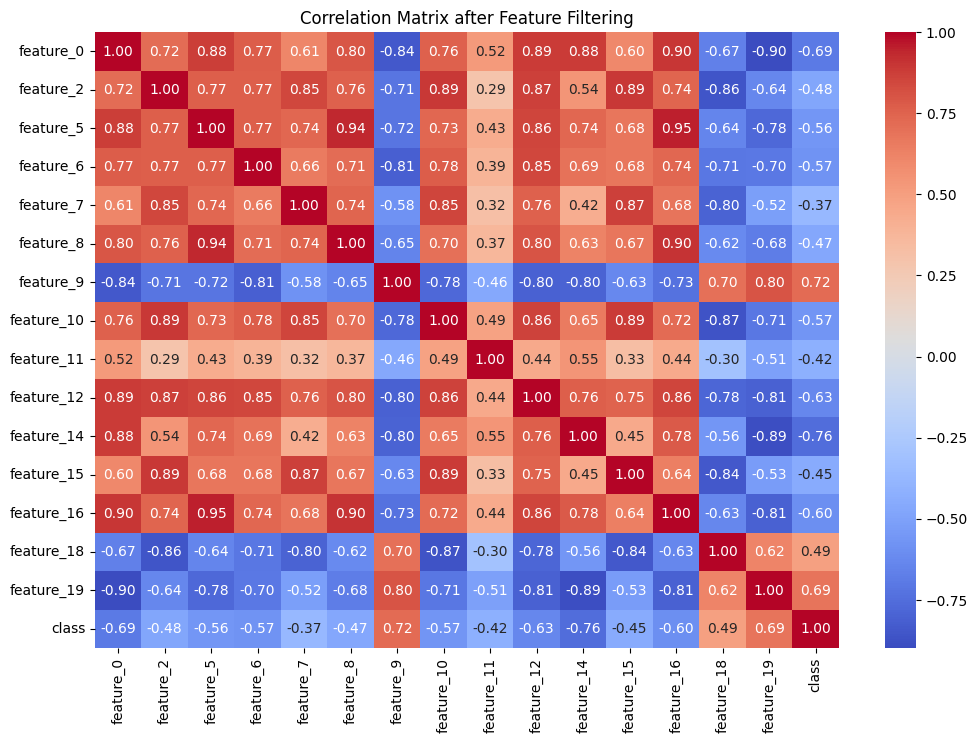

In [26]:
# Построение корреляционной матрицы до фильтрации
corr_before = df.corr()

# Вывод матрицы корреляции до фильтрации
plt.figure(figsize=(12, 8))
sns.heatmap(corr_before, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix before Feature Filtering')
plt.show()

# Построение новой корреляционной матрицы после фильтрации
corr_filtered = df_filtered.corr()

# Вывод матрицы корреляции после фильтрации
plt.figure(figsize=(12, 8))
sns.heatmap(corr_filtered, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix after Feature Filtering')
plt.show()